## Data Collection & Preparing

In [5]:
import pandas as pd
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv(r"C:\Users\nisfa\Downloads\new_retail_data.csv\new_retail_data.csv")

In [8]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

#### Removing and handling null values

In [14]:
data.isnull().sum()


Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [16]:
#drop rows with missing essential IDs
data=data.dropna(subset=['Transaction_ID','Customer_ID','Feedback'])
# fill categorical columns with mode
categorical_cols=['Product_Category','Gender','Customer_Segment','Product_Brand','Shipping_Method','Payment_Method','Order_Status']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0],inplace=True)

# fill numerical columns with median
numerical_columns=['Age','Total_Purchases','Amount','Total_Amount','Ratings']
for col in numerical_columns:
    data[col].fillna(data[col].median(),inplace=True)


In [18]:
data.isnull().sum()

Transaction_ID        0
Customer_ID           0
Name                380
Email               345
Phone               361
Address             313
City                248
State               279
Zipcode             340
Country             270
Age                   0
Gender                0
Income              290
Customer_Segment      0
Date                359
Year                348
Month               272
Time                350
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64

In [20]:
data=data.dropna(subset=['Name','Email','Phone','Address','City','State','Zipcode','Country']) # drop missing values the unnecessary text columns

In [22]:
#print(data['Income'].unique())
data=data.dropna(subset=['Income'])

In [24]:
data[['Month','Year','Time']]

,Month,Year,Time
0,September,2023.0,22:03:55
1,December,2023.0,8:42:04
2,April,2023.0,4:06:29
3,May,2023.0,14:55:17
4,January,2024.0,16:54:07
...,...,...,...
302005,January,2024.0,23:40:29
302006,December,2023.0,2:55:45
302007,February,2024.0,2:43:49
302008,September,2023.0,11:20:31


In [26]:
# convert date to datetime format
data['Date']=pd.to_datetime(data['Date'],errors='coerce')
# Convert time to time format
data['Time']=pd.to_datetime(data['Time'],format='%H:%M:%S',errors='coerce').dt.time

In [27]:
data.dtypes

Transaction_ID             float64
Customer_ID                float64
Name                        object
Email                       object
Phone                      float64
Address                     object
City                        object
State                       object
Zipcode                    float64
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                       float64
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings             

In [28]:
data.isnull().sum()

Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                354
Year                347
Month               270
Time                347
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64

In [32]:
data=data.dropna(subset=['Date','Year','Month','Time'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297055 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    297055 non-null  float64       
 1   Customer_ID       297055 non-null  float64       
 2   Name              297055 non-null  object        
 3   Email             297055 non-null  object        
 4   Phone             297055 non-null  float64       
 5   Address           297055 non-null  object        
 6   City              297055 non-null  object        
 7   State             297055 non-null  object        
 8   Zipcode           297055 non-null  float64       
 9   Country           297055 non-null  object        
 10  Age               297055 non-null  float64       
 11  Gender            297055 non-null  object        
 12  Income            297055 non-null  object        
 13  Customer_Segment  297055 non-null  object        
 14  Date     

 our data is cleaned and formatted ,now we need to figure it out  there is any duplicates

In [37]:
data.duplicated().sum()

4

In [39]:
# we need to remove these duplicates
data.drop_duplicates(inplace=True)

Outlier Detection

In [38]:
type(data)

pandas.core.frame.DataFrame

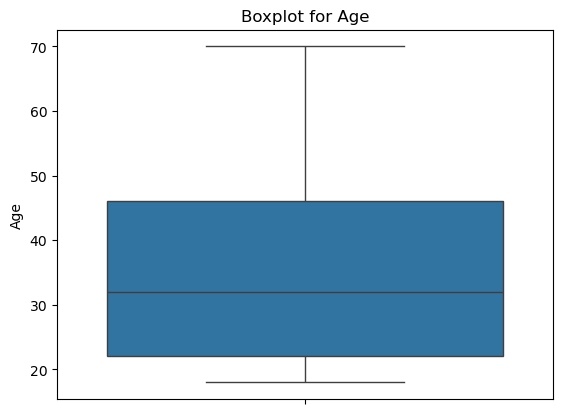

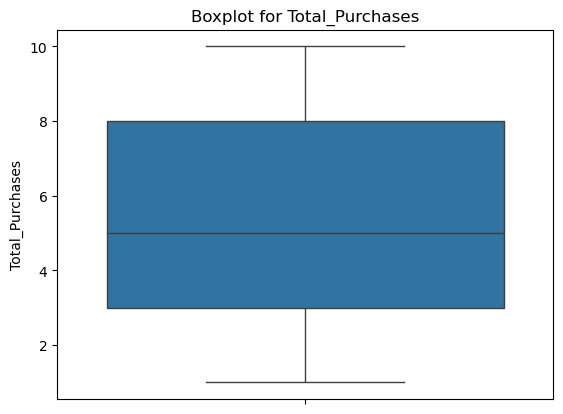

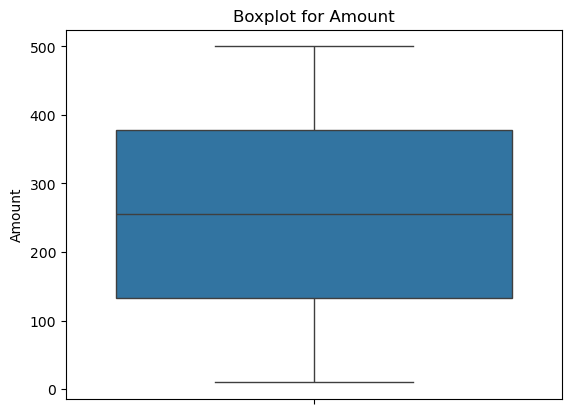

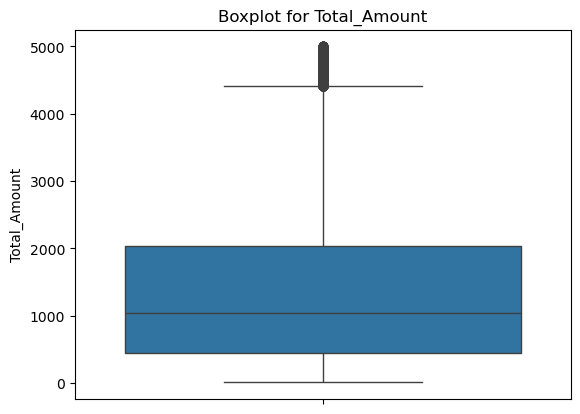

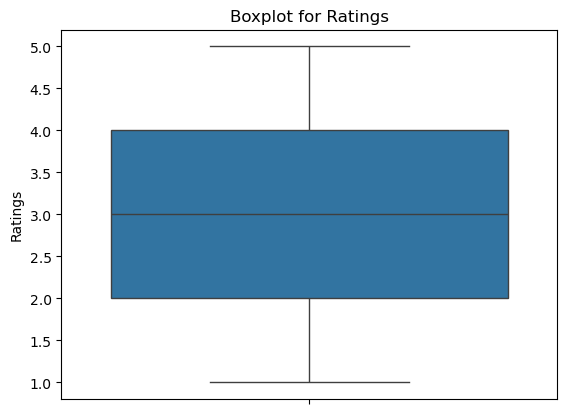

In [40]:
numerical_cols=['Age','Total_Purchases','Amount','Total_Amount','Ratings']

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In the total amount distribution found that the amount values significantly higher than the typical range.

Possibilities:
1.Possible Fraudulent transaction (abnormally high purchases)

2.Other Possible Causes: it could be legitimate,like bulk purchases or high value products.

#### Detecting Outliers

In [44]:
# IQR Method
Q1=data['Total_Amount'].quantile(0.25)
Q3=data['Total_Amount'].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# fILTER OUTLIER TRANSACTION
outliers_iqr=data[(data['Total_Amount']<lower_bound)|(data['Total_Amount']>upper_bound)]

# Display potential fraud cases
print(f"Potential Fraudulent transactions(IQR METHOD):{len(outliers_iqr)}")
print(outliers_iqr)

Potential Fraudulent transactions(IQR METHOD):3907
        Transaction_ID  Customer_ID                 Name  \
150          4613625.0      72950.0        Gregory Bates   
159          8093529.0      45413.0       Lauren Johnson   
395          5777205.0      20280.0       Patrick Joseph   
400          4669285.0      64275.0    Mrs. Taylor Dixon   
484          9627400.0      97549.0        Brady Stanley   
...                ...          ...                  ...   
301721       5518811.0      61956.0     Elizabeth Gaines   
301723       7612722.0      91060.0      Michael Sherman   
301766       2173333.0      31082.0  Mr. Martin Williams   
301904       8626872.0      62191.0         Chad Stewart   
301960       3711781.0      84277.0   Jennifer Rodriguez   

                        Email         Phone                        Address  \
150        Gerald65@gmail.com  7.785500e+09   3720 Matthew Ville Suite 453   
159          Lisa82@gmail.com  1.816017e+09  0288 Jennifer Spurs Suite 2

<Axes: xlabel='Total_Amount', ylabel='Count'>

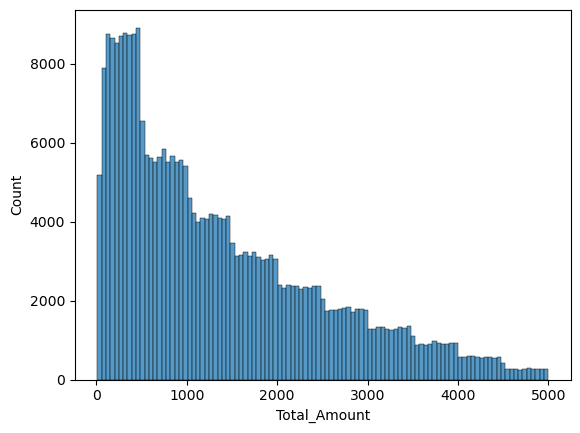

In [46]:
sns.histplot(data['Total_Amount'])

Some times these abnormalites shows because of pricing errors,So lets figure it out

#### Detect negative or Zero prices

Some times  errors occur when prices are entered incorrectly

In [48]:
pricing_errors=data[data['Total_Amount']<=0]
print(f'Pricing Errors (Negative or Zero prices):{len(pricing_errors)}')
print(pricing_errors)

Pricing Errors (Negative or Zero prices):0
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Name, Email, Phone, Address, City, State, Zipcode, Country, Age, Gender, Income, Customer_Segment, Date, Year, Month, Time, Total_Purchases, Amount, Total_Amount, Product_Category, Product_Brand, Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, Ratings, products]
Index: []

[0 rows x 30 columns]


#### Check  for inconsistent pricing of the same product

In [51]:
price_variation=data.groupby('Product_Category')['Total_Amount'].std().reset_index()

#set a threshold for usually high variations
threshold=price_variation['Total_Amount'].quantile(0.95)

# find products with high price variation
inconsistent_prices=price_variation[price_variation['Total_Amount']>threshold]
print(f'products with inconsistent pricing:{len(inconsistent_prices)}')
print(inconsistent_prices)

products with inconsistent pricing:1
  Product_Category  Total_Amount
2      Electronics   1131.890541


Keeping these anomalies for further study

In [ ]:
retail_analysis_cleaned=data.to_excel("retail_analysis_cleand.xlsx",index=False)

In [42]:
original=data.copy() # for a backup

## EDA-Exploratory Data analysis

#### Overview of the Dataset

In [55]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [57]:
data.shape

(297051, 30)

In [59]:
# summary statistics

data.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,2.970510e+05,297051.000000,2.970510e+05,297051.000000,297051.000000,297051,297051.000000,297051.000000,297051.000000,297051.000000,297051.000000
mean,5.494800e+06,55008.764172,5.500640e+09,50298.897075,35.471384,2023-08-30 15:58:55.720128768,2023.165046,5.359386,255.216661,1367.613633,3.162332
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023-03-01 00:00:00,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.246920e+06,32468.500000,3.253857e+09,25422.000000,22.000000,2023-05-31 00:00:00,2023.000000,3.000000,133.036764,439.343912,2.000000
50%,5.497883e+06,55018.000000,5.504494e+09,50597.000000,32.000000,2023-08-31 00:00:00,2023.000000,5.000000,255.484850,1041.221519,3.000000
75%,7.739098e+06,77508.000000,7.749351e+09,75265.500000,46.000000,2023-11-30 00:00:00,2023.000000,8.000000,377.577069,2027.744035,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024-02-29 00:00:00,2024.000000,10.000000,499.997911,4999.625796,5.000000
std,2.596006e+06,26006.327225,2.595887e+09,28974.573906,15.015065,NaN,0.371222,2.866857,141.315561,1128.594824,1.320777


In [61]:
# summary for Categorical columns
data.describe(include='object')

,Name,Email,Address,City,State,Country,Gender,Income,Customer_Segment,Month,Time,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,products
count,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051,297051
unique,157749,52673,294729,130,54,5,2,3,3,12,83542,5,18,33,4,3,4,4,318
top,Michael Smith,Michael59@gmail.com,68488 Brandy Stream,Chicago,England,USA,Male,Medium,Regular,April,02:55:36,Electronics,Pepsi,Water,Excellent,Same-Day,Credit Card,Delivered,Spring water
freq,142,92,2,21344,62078,93762,184856,128261,144162,40661,14,70296,30086,24093,99091,102852,88897,128648,2467


In [62]:
data.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

#### Analysing Sales Trends

Sales over a time(Daily,Monthly,seasonal trends)

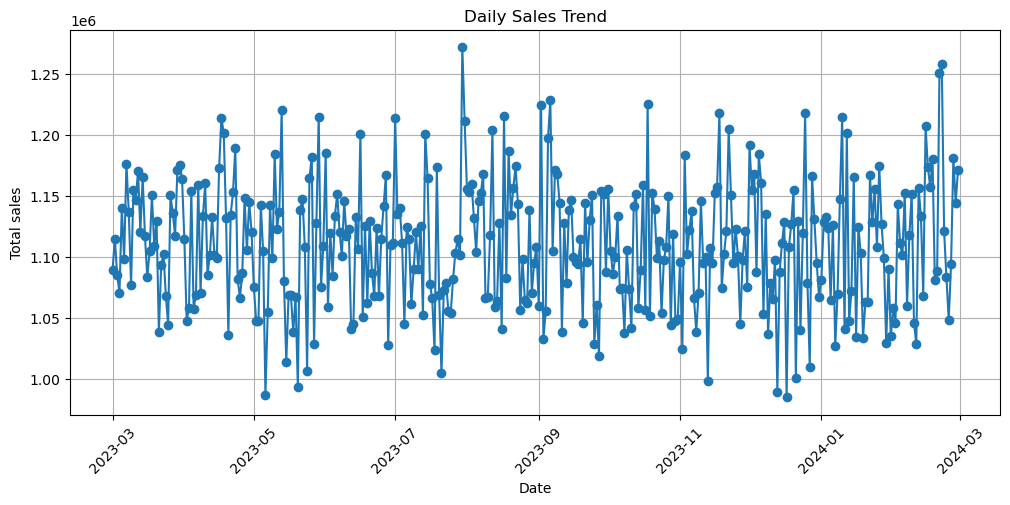

In [67]:
import matplotlib.pyplot as plt

# Aggregate sales by data
daily_sales=data.groupby('Date')['Total_Amount'].sum()

# plot sales trend
plt.figure(figsize=(12,5))
plt.plot(daily_sales,marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Monthly sales Trend

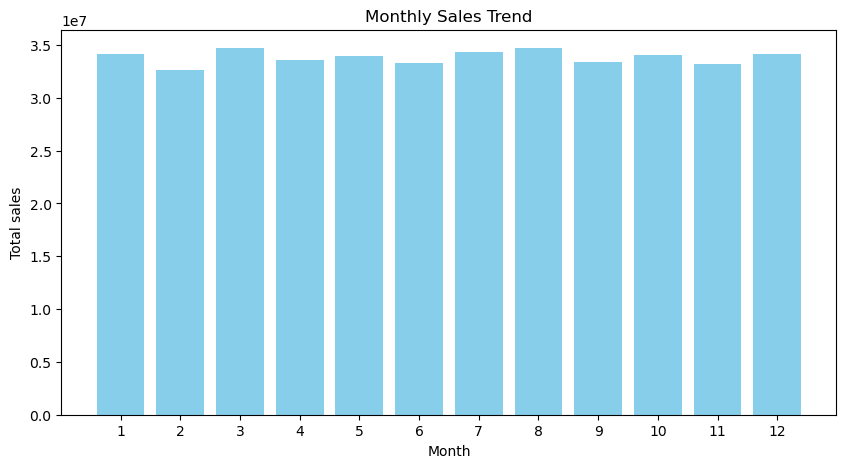

In [70]:
data['Month']=data['Date'].dt.month
monthly_sales=data.groupby('Month')['Total_Amount'].sum()

plt.figure(figsize=(10,5))
plt.bar(monthly_sales.index,monthly_sales.values,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Monthly Sales Trend')
plt.xticks(range(1,13))
plt.show()

#### Top Selling Products & Categories

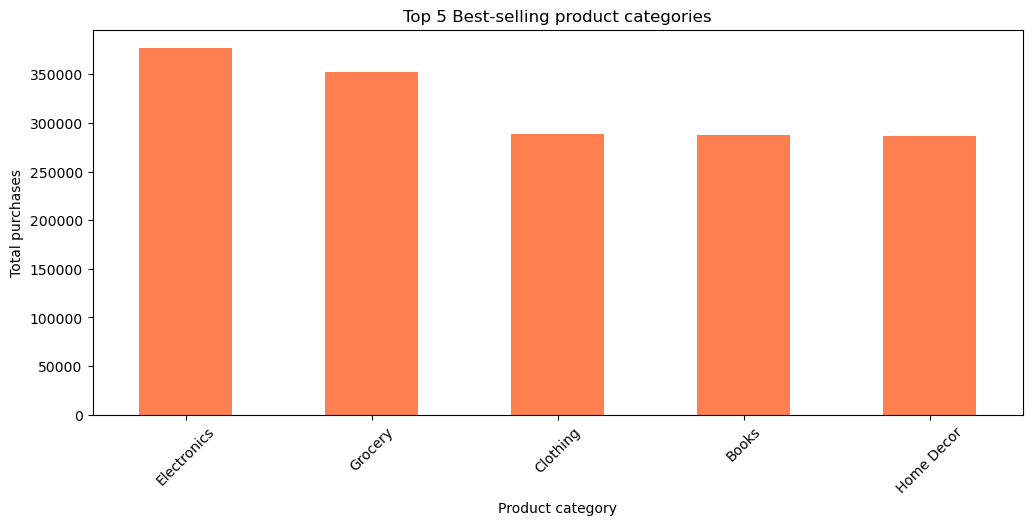

In [73]:
# Top 5 best-selling products
top_products=data.groupby('Product_Category')['Total_Purchases'].sum().nlargest(10)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar',color='coral')
plt.xlabel('Product category')
plt.ylabel('Total purchases')
plt.title('Top 5 Best-selling product categories')
plt.xticks(rotation=45)
plt.show()

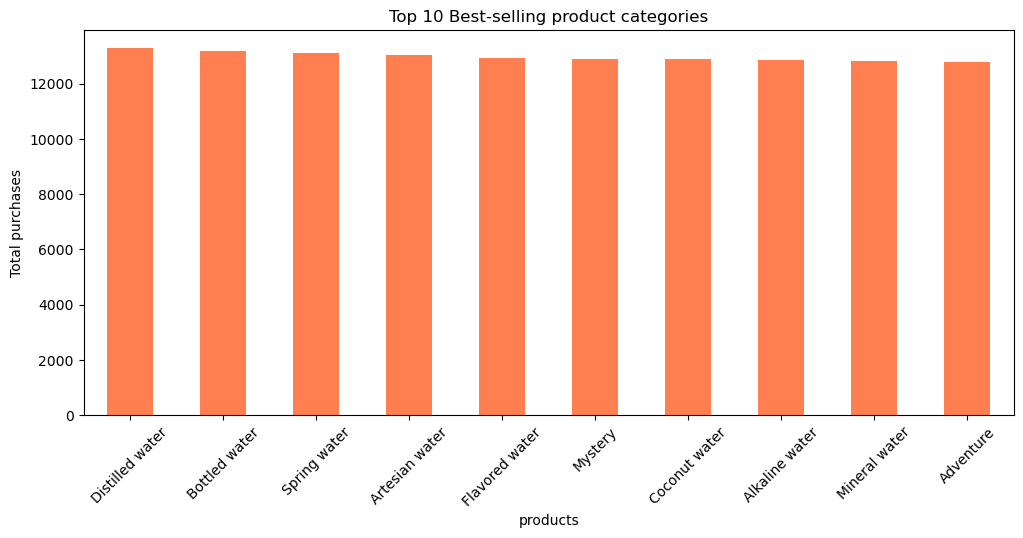

In [75]:
top_products=data.groupby('products')['Total_Purchases'].sum().nlargest(10)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar',color='coral')
plt.xlabel('products')
plt.ylabel('Total purchases')
plt.title('Top 10 Best-selling product categories')
plt.xticks(rotation=45)
plt.show()

#### Customer Demographics & Buying patterns

Gender-based purchase Behaviour

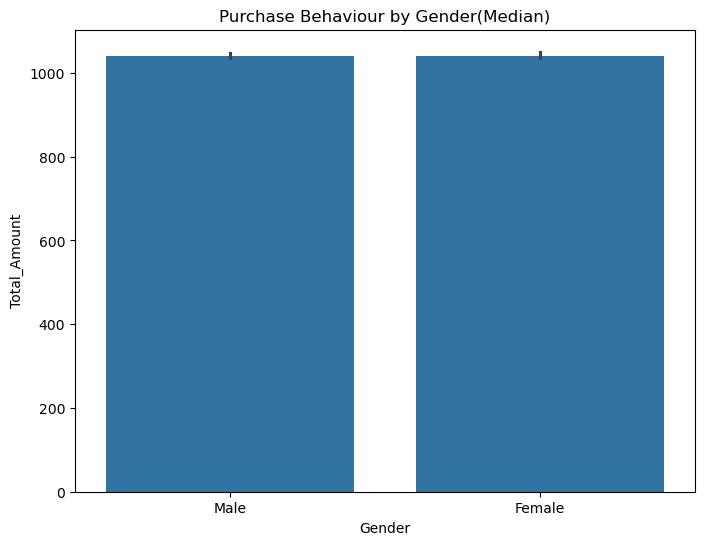

In [79]:
import numpy as np

plt.figure(figsize=(8,6))
sns.barplot(x='Gender',y='Total_Amount',data=data,estimator=np.median)
plt.title('Purchase Behaviour by Gender(Median)')
plt.show();

In [80]:
data.groupby('Gender')['Total_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112195.0,1368.383251,1128.538040,10.056353,438.133560,1041.221519,2028.012306,4999.625796
Male,184856.0,1367.146528,1128.632083,10.003750,439.955718,1041.221519,2027.402902,4999.171428


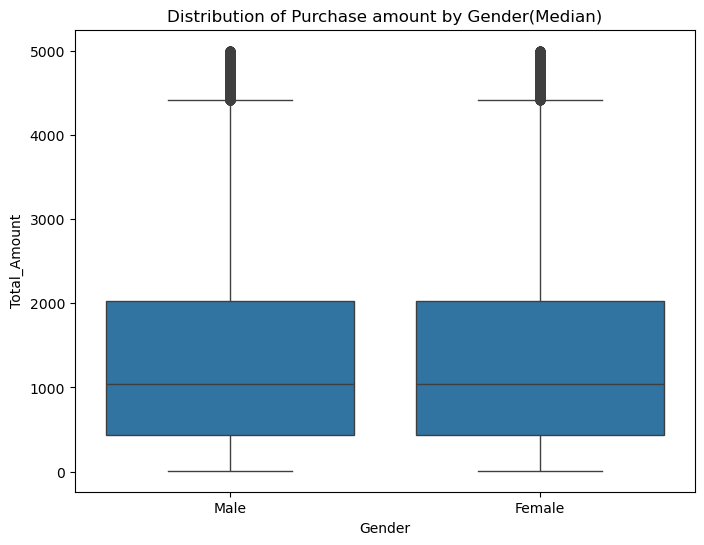

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender',y='Total_Amount',data=data)
plt.title('Distribution of Purchase amount by Gender(Median)')
plt.show();

Age Group Analysis

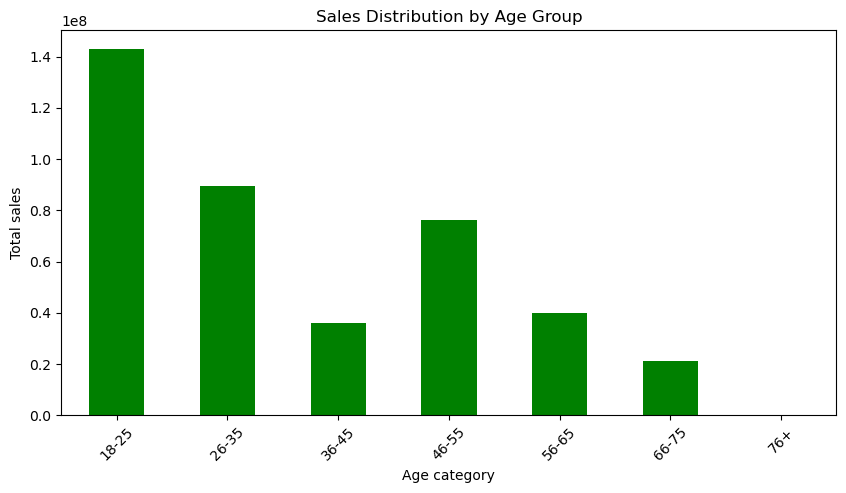

In [44]:
bins=[18,25,35,45,55,65,75,100]
labels=['18-25','26-35','36-45','46-55','56-65','66-75','76+']
data['Age_group']=pd.cut(data['Age'],bins=bins,labels=labels,right=False)

age_sales=data.groupby('Age_group')['Total_Amount'].sum()

plt.figure(figsize=(10,5))
age_sales.plot(kind='bar',color='green')
plt.xlabel('Age category')
plt.ylabel('Total sales')
plt.title('Sales Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

#### Product Return Rates

In [89]:
data['Order_Status'].value_counts()

Order_Status
Delivered     128648
Shipped        63933
Processing     56224
Pending        48246
Name: count, dtype: int64

Fortunaley no returns,So we couldn't find the return rates.

#### Payment Method Analysis

In [93]:
Payment_counts=data['Payment_Method'].value_counts()
Payment_counts

Payment_Method
Credit Card    88897
Debit Card     75500
Cash           72632
PayPal         60022
Name: count, dtype: int64

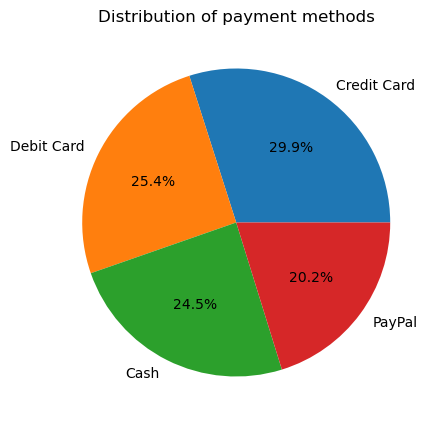

In [95]:
plt.figure(figsize=(8,5))
Payment_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of payment methods')
plt.ylabel('')
plt.show()

### RFM Analysis

In [98]:
reference_date=data['Date'].max()

rfm_df=data.groupby('Customer_ID').agg({'Date':lambda x:(reference_date-x.max()).days,'Transaction_ID':'nunique','Total_Amount':'sum'}).reset_index()

rfm_df.columns=['Customer_ID','Recency','Frequency','Monetary']
rfm_df.head()
                                        

,Customer_ID,Recency,Frequency,Monetary
0,10000.0,102,4,5007.566357
1,10001.0,104,5,8136.462824
2,10002.0,94,5,4104.013951
3,10003.0,227,2,2340.496447
4,10004.0,30,2,2356.516683


#### Assign RFM score

In [101]:
rfm_df['R_score']=pd.qcut(rfm_df['Recency'],4,labels=[4,3,2,1])
rfm_df['F_score']=pd.qcut(rfm_df['Frequency'],4,labels=[1,2,3,4])
rfm_df['M_score']=pd.qcut(rfm_df['Monetary'],4,labels=[1,2,3,4])

# Combine RFM scores into a single score
rfm_df['RFM_score']=rfm_df['R_score'].astype(str)+rfm_df['F_score'].astype(str)+rfm_df['M_score'].astype(str)

rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,10000.0,102,4,5007.566357,2,3,3,233
1,10001.0,104,5,8136.462824,2,4,4,244
2,10002.0,94,5,4104.013951,2,4,2,242
3,10003.0,227,2,2340.496447,1,1,2,112
4,10004.0,30,2,2356.516683,4,1,2,412


#### Customer Segmentation

In [104]:
def assign_segment(row):
    if row['RFM_score'] in ['444','443','434','433']:
        return 'Best Customers'
    elif row['RFM_score'] in ['344','343','334','333']:
        return 'Loyal Customers'
    elif row['RFM_score'] in ['144','143','134','133']:
        return 'New Customers'
    elif row['RFM_score'] in ['111','112','121','122']:
        return 'Lost Customers'
    else:
        return 'Other'
rfm_df['Segment']=rfm_df.apply(assign_segment,axis=1)
rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,10000.0,102,4,5007.566357,2,3,3,233,Other
1,10001.0,104,5,8136.462824,2,4,4,244,Other
2,10002.0,94,5,4104.013951,2,4,2,242,Other
3,10003.0,227,2,2340.496447,1,1,2,112,Lost Customers
4,10004.0,30,2,2356.516683,4,1,2,412,Other


In [45]:
# save RFM analysis results
rfm_df.to_csv("rfm_analysis.csv",index=False)

In [106]:
Segment=rfm_df['Segment'].value_counts()
Segment

Segment
Other              48725
Lost Customers     14495
Best Customers     11182
Loyal Customers     9455
New Customers       2740
Name: count, dtype: int64

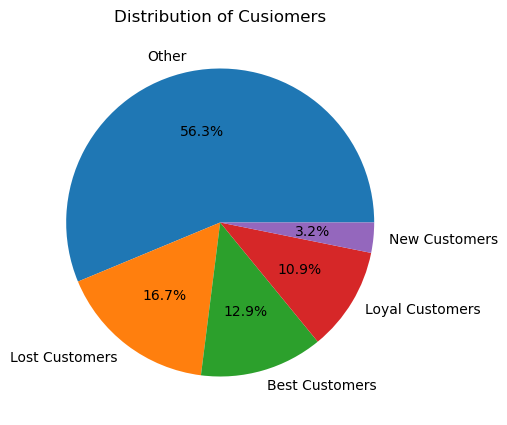

In [49]:
plt.figure(figsize=(8,5))
Segment.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Cusiomers')
plt.ylabel('')
plt.show()

### Data Preprocessing For Machine learning

In [46]:
# drop the columns not needed for machine learning process
data.drop(columns=['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address','Zipcode', 'Country','Age_group','Time','Month','Year'],
                            inplace=True)

#### Feature Engineering

In [48]:
data['DayOfWeek']=data['Date'].dt.dayofweek #Monday=0,sunday=6
data['Quarter']=data['Date'].dt.quarter
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Weekday']=data['Date'].dt.weekday
data['DayofYear']=data['Date'].dt.dayofyear

In [50]:
data.columns

Index(['City', 'State', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date',
       'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products', 'DayOfWeek',
       'Quarter', 'Year', 'Month', 'Weekday', 'DayofYear'],
      dtype='object')

In [52]:
data['Feedback'].value_counts()

Feedback
Excellent    99091
Good         93641
Average      61700
Bad          42619
Name: count, dtype: int64

In [54]:
# Lets convert feedback into numerical values
feedback_mapping={'Excellent':5,'Good':4,'Average':3,'Bad':1}
data['Feedback']=data['Feedback'].map(feedback_mapping)

#### Categorical Encoding

In [56]:
# Encode Categorical Variables using onehot encoding
categorical_cols=['Gender','Income','Customer_Segment',
       'Product_Brand', 'Product_Category','Shipping_Method',
       'Payment_Method', 'Order_Status']
data=pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [58]:
# Encode categories(For large number of categories) using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['State']=le.fit_transform(data['State'])
data['City']=le.fit_transform(data['City'])
data['Product_Type']=le.fit_transform(data['Product_Type'])
data['products']=le.fit_transform(data['products'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297051 entries, 0 to 302009
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   City                             297051 non-null  int32         
 1   State                            297051 non-null  int32         
 2   Age                              297051 non-null  float64       
 3   Date                             297051 non-null  datetime64[ns]
 4   Total_Purchases                  297051 non-null  float64       
 5   Amount                           297051 non-null  float64       
 6   Total_Amount                     297051 non-null  float64       
 7   Product_Type                     297051 non-null  int32         
 8   Feedback                         297051 non-null  int64         
 9   Ratings                          297051 non-null  float64       
 10  products                         297051 non-null 

In [62]:
data['Date'].diff().value_counts() # data looks like irregular time gaps.this suggest that the time stamps are not evenly spaced

Date
7 days       848
0 days       837
12 days      836
-12 days     836
11 days      827
            ... 
363 days       4
-364 days      4
364 days       4
-365 days      3
365 days       2
Name: count, Length: 731, dtype: int64

In [127]:
data.dtypes

City                                        int32
State                                       int32
Age                                       float64
Date                               datetime64[ns]
Total_Purchases                           float64
Amount                                    float64
Total_Amount                              float64
Product_Type                                int32
Feedback                                    int64
Ratings                                   float64
products                                    int32
DayOfWeek                                   int32
Quarter                                     int32
Year                                        int32
Month                                       int32
Weekday                                     int32
DayofYear                                   int32
Gender_Male                                  bool
Income_Low                                   bool
Income_Medium                                bool


In [64]:
preprocessed=data.copy()

## Sales Forecasting

In [129]:
#Lag Features(to capture previous sales trends)
data['Sales_Lag_1']=data['Total_Amount'].shift(1) 
data['Sales_Lag_7']=data['Total_Amount'].shift(7)

In [131]:
print(data['Sales_Lag_1'])
print(data['Sales_Lag_7'])

0                 NaN
1          324.086270
2          806.707815
3         1063.432799
4         2466.854021
             ...     
302005    2362.120301
302006     973.962984
302007     285.137301
302008     182.105285
302009     120.834784
Name: Sales_Lag_1, Length: 297051, dtype: float64
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
302005     501.674654
302006     413.734856
302007     151.805498
302008    2401.466964
302009    2659.976987
Name: Sales_Lag_7, Length: 297051, dtype: float64


In [133]:
# Moving averages
data['Sales_MA_7']=data['Total_Amount'].rolling(window=7).mean()
data['Sales_MA_30']=data['Total_Amount'].rolling(window=30).mean()

In [135]:
data['Sales_MA_30']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
302005    1199.726835
302006    1188.289894
302007    1162.168971
302008    1059.268988
302009    1100.497464
Name: Sales_MA_30, Length: 297051, dtype: float64

In [133]:
# check stationary(Dicky fuller test)
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Total_Amount'])
print(f'ADF Statistic:{result[0]},p-value:{result[1]}')


ADF Statistic:-546.7609280895791,p-value:0.0


ADF statistics shows a very negative value suggests strong evidence for stationarity.
p-value indicates the null hypothesis is rejected,meaning the Total_Amount time series is stationary.Now we can proceed with Modeling.

In [139]:
#  need resampling,we should resample the data to fixed frequency
data.set_index('Date',inplace=True)
# Resample to daily frequency and fill missing values with Zero
data_resampled=data.resample('D').sum().fillna(0)
print(data_resampled.head())

             City  State      Age  Total_Purchases         Amount  \
Date                                                                
2023-03-01  52234  15673  28106.0           4200.0  204773.858026   
2023-03-02  49288  15412  28293.0           4288.0  205300.412791   
2023-03-03  47308  14858  26764.0           4127.0  202915.155878   
2023-03-04  49739  15767  27063.0           4274.0  193774.217855   
2023-03-05  51242  15551  28303.0           4341.0  211177.579945   

            Total_Amount  Product_Type  Feedback  Ratings  products  ...  \
Date                                                                 ...   
2023-03-01  1.089183e+06         14200      2984   2561.0    123386  ...   
2023-03-02  1.115221e+06         14460      2874   2455.0    125880  ...   
2023-03-03  1.084951e+06         14341      2802   2424.0    122719  ...   
2023-03-04  1.070825e+06         13901      2905   2485.0    122719  ...   
2023-03-05  1.140212e+06         14409      2957   2519.0   

In [141]:
data_resampled.index.duplicated().sum()

0

In [143]:
data.reset_index(inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297051 entries, 0 to 297050
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Date                             297051 non-null  datetime64[ns]
 1   City                             297051 non-null  int32         
 2   State                            297051 non-null  int32         
 3   Age                              297051 non-null  float64       
 4   Total_Purchases                  297051 non-null  float64       
 5   Amount                           297051 non-null  float64       
 6   Total_Amount                     297051 non-null  float64       
 7   Product_Type                     297051 non-null  int32         
 8   Feedback                         297051 non-null  int64         
 9   Ratings                          297051 non-null  float64       
 10  products                         297051 non-

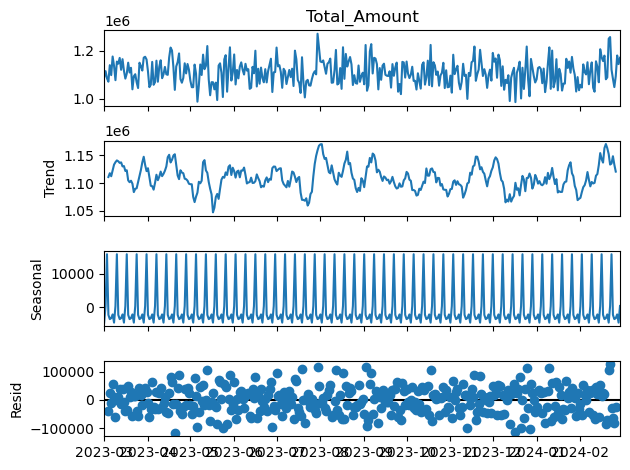

In [147]:
# check Decompose Time series(Trend,Seasonality,Residuals)
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_resampled['Total_Amount'],model='additive',period=7)
decomp.plot()
plt.show()

Data has a clear trend and seasonality.The seasonal pattern suggests that your data follows a repeating cycle every 7 observations.
The residuals appear mostly random,meaning the decomposition has effectively extracted the patterns.

#### Model Selection and Training

There is a memory error while using the ARIMA model from Statsmodels.The error occurs due to insufficient RAM when  allocating large array.
So i used Smaller subset of my Dataset.

In [121]:
from sklearn.model_selection import train_test_split
data=data[['Total_Amount']]
df_sample=data.sample(frac=0.5,random_state=42)# use 50% data
df_sample.dropna(inplace=True)


In [123]:
train_size=int(len(df_sample)*0.8)
train,test=df_sample[:train_size],df_sample[train_size:]

In [125]:
df_sample.isnull().sum()

Total_Amount    0
dtype: int64

In [127]:
train.isnull().sum()

Total_Amount    0
dtype: int64

### ARIMA(Auto-Regressive Integrated Moving Average)

Use pmdarima for automatic order Selection

In [131]:
from pmdarima import auto_arima
arima_model=auto_arima(train,seasonal=True,m=7,
                       max_p=3,max_q=3,
                       max_P=2,maq_Q=2,
                       max_d=1,max_D=1,stepwise=True,suppress_warnings=True) # fit auto arima model


KeyboardInterrupt: 

In [ ]:
y_pred_arima=arima_model.predict(n_periods=len(test))

In [ ]:
# covert predictions to Dataframe evaluation
y_pred_arima=pd.DataFrame(y_pred_arima,index=test.index,columns=['Predictions'])

Couldn't run this model in this Jupyter because of the RAM issue.It would be better it could run in google's colab.

### Model Evaluation

#### Compare RMSE and MAPE for different models

ARIMA

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

rmse=mean_absolute_error(test,y_pred_arima)
mse=mean_squared_error(test,y_pred_arima)
rmse=np.sqrt(mse)
r2==r2_score(test,y_pred_arima)


NameError: name 'y_pred_arima' is not defined

### Churn Prediction Using Logistic Regression

In [66]:
print(preprocessed['Feedback'].unique())

[5 3 1 4]


This  dataset has no column named churn ,So we are using Feedback for to predict churn.


In [70]:
preprocessed['Churn']=preprocessed['Feedback'].apply(lambda x:0 if x==1 else 1)

In [76]:
preprocessed['Churn']

0         1
1         1
2         1
3         1
4         0
         ..
302005    0
302006    1
302007    1
302008    1
302009    1
Name: Churn, Length: 297051, dtype: int64

In [74]:
print(preprocessed[['Feedback','Churn']].head(10))

   Feedback  Churn
0         5      1
1         5      1
2         3      1
3         5      1
4         1      0
5         4      1
6         1      0
7         1      0
8         1      0
9         5      1



##### Define target and Features

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [98]:
features=['City', 'State', 'Age','Total_Purchases', 'Amount',
       'Total_Amount', 'Product_Type', 'Feedback', 'Ratings', 'products',
       'DayOfWeek', 'Quarter', 'Year', 'Month', 'Weekday', 'DayofYear',
       'Gender_Male', 'Income_Low', 'Income_Medium',
       'Customer_Segment_Premium', 'Customer_Segment_Regular',
       'Product_Brand_Apple', 'Product_Brand_Bed Bath & Beyond',
       'Product_Brand_BlueStar', 'Product_Brand_Coca-Cola',
       'Product_Brand_HarperCollins', 'Product_Brand_Home Depot',
       'Product_Brand_IKEA', 'Product_Brand_Mitsubhisi',
       'Product_Brand_Nestle', 'Product_Brand_Nike',
       'Product_Brand_Penguin Books', 'Product_Brand_Pepsi',
       'Product_Brand_Random House', 'Product_Brand_Samsung',
       'Product_Brand_Sony', 'Product_Brand_Whirepool', 'Product_Brand_Zara',
       'Product_Category_Clothing', 'Product_Category_Electronics',
       'Product_Category_Grocery', 'Product_Category_Home Decor',
       'Shipping_Method_Same-Day', 'Shipping_Method_Standard',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_PayPal', 'Order_Status_Pending',
       'Order_Status_Processing', 'Order_Status_Shipped']

In [100]:
X=preprocessed[features]
y=preprocessed['Churn']
print(X)
print(y)

        City  State   Age  Total_Purchases      Amount  Total_Amount  \
0         35      4  21.0              3.0  108.028757    324.086270   
1         87      9  19.0              2.0  403.353907    806.707815   
2         46     33  48.0              3.0  354.477600   1063.432799   
3         40     39  56.0              7.0  352.407717   2466.854021   
4         20      9  22.0              2.0  124.276524    248.553049   
...      ...    ...   ...              ...         ...           ...   
302005   118     33  31.0              5.0  194.792597    973.962984   
302006    52      4  35.0              1.0  285.137301    285.137301   
302007    18      9  41.0              3.0   60.701761    182.105285   
302008    49     39  41.0              1.0  120.834784    120.834784   
302009   119     51  28.0              7.0  340.319059   2382.233417   

        Product_Type  Feedback  Ratings  products  ...  \
0                 23         5      5.0        86  ...   
1                 2

#### Split the data into test and train data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Build and train the model

In [106]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred=model.predict(X_test)

#### Print the Accuracy score

In [110]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print('Confusion Metrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy:0.97
Confusion Metrix:
 [[ 7595   925]
 [  983 49908]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      8520
           1       0.98      0.98      0.98     50891

    accuracy                           0.97     59411
   macro avg       0.93      0.94      0.93     59411
weighted avg       0.97      0.97      0.97     59411



This  Logistic Regression Model shows 97% Accuracy.

## Thank You